In [43]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc90/BHOSS_CODE"
data = "Rh20_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A93_190.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9948.482286 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 2.22027e-30 0.00196952
Total flux = 1.999545 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9077.464542 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.000667849
Total flux = 1.691762 Jy at 230 GHz
166:20:25.430 - Start Program


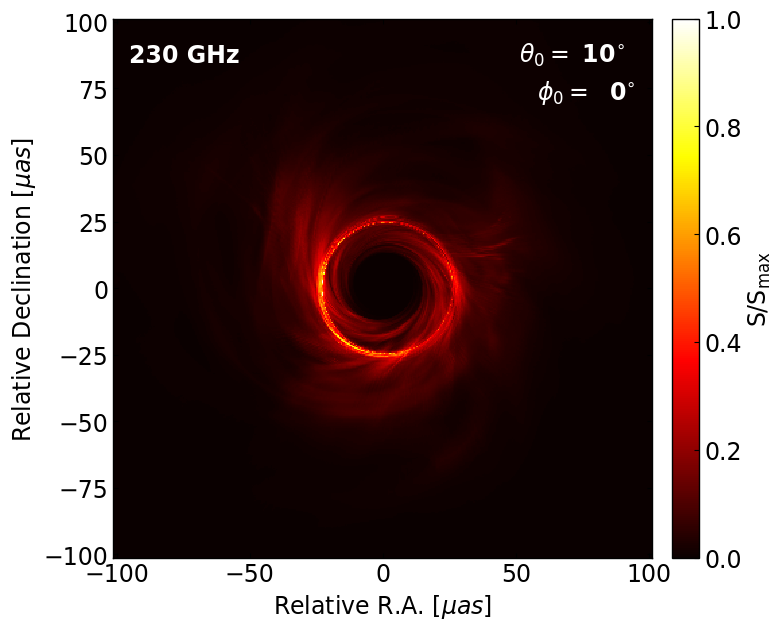

In [8]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [21]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==20) | (Rhigh==40) | (Rhigh==80) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [2]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 10, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc10/BHOSS_CODE
96, flux: 2.158457 at 9008.139053
97, flux: 2.142177 at 9017.844868
98, flux: 2.104538 at 9027.551100
99, flux: 2.082417 at 9038.646851
100, flux: 2.081255 at 9048.356431
101, flux: 2.059931 at 9058.061637
102, flux: 2.050226 at 9067.764826
103, flux: 2.040857 at 9077.464542
104, flux: 2.037421 at 9088.552963
105, flux: 1.975751 at 9098.254801
106, flux: 1.955619 at 9107.957635
107, flux: 1.968913 at 9117.659184
108, flux: 1.938017 at 9127.363548
109, flux: 1.920688 at 9138.452062
110, flux: 1.907996 at 9148.158890
111, flux: 1.887538 at 9157.868704
112, flux: 1.858585 at 9167.579583
113, flux: 1.841931 at 9178.672003
114, flux: 1.871311 at 9188.377169
115, flux: 1.927138 at 9198.079088
116, flux: 1.960082 at 9207.781556
117, flux: 1.929105 at 9217.482565
118, flux: 1.859878 at 9228.573654
119, flux: 1.852947 at 9238.281441
120, flux: 1.858063 at 9247.990304
121, flux: 1.847363 at 9257.698128
122, flux

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.972753 Jy, the density scale = 1.290000e-18


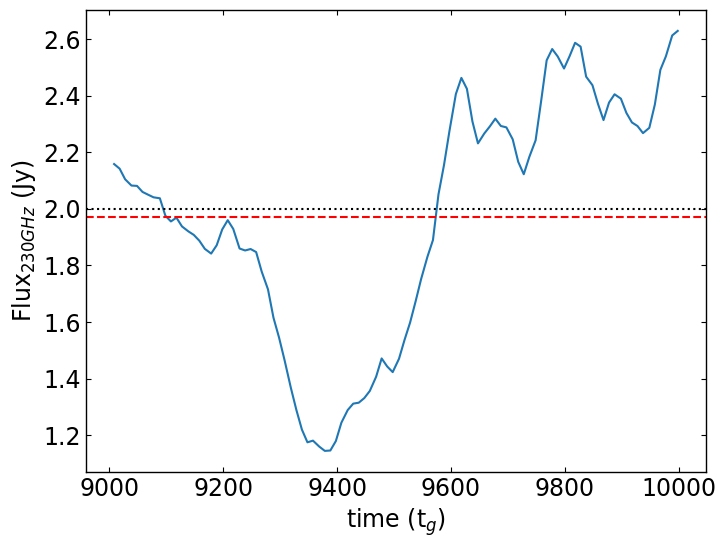

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.158457 Jy at 9008.139053
97:: 2.142177 Jy at 9017.844868
98:: 2.104538 Jy at 9027.551100
99:: 2.082417 Jy at 9038.646851
100:: 2.081255 Jy at 9048.356431
101:: 2.059931 Jy at 9058.061637
102:: 2.050226 Jy at 9067.764826
103:: 2.040857 Jy at 9077.464542
104:: 2.037421 Jy at 9088.552963
105:: 1.975751 Jy at 9098.254801
106:: 1.955619 Jy at 9107.957635
107:: 1.968913 Jy at 9117.659184
108:: 1.938017 Jy at 9127.363548
109:: 1.920688 Jy at 9138.452062
110:: 1.907996 Jy at 9148.158890
111:: 1.887538 Jy at 9157.868704
112:: 1.858585 Jy at 9167.579583
113:: 1.841931 Jy at 9178.672003
114:: 1.871311 Jy at 9188.377169
115:: 1.927138 Jy at 9198.079088
116:: 1.960082 Jy at 9207.781556
117:: 1.929105 Jy at 9217.482565
118:: 1.859878 Jy at 9228.573654
119:: 1.852947 Jy at 9238.281441
120:: 1.858063 Jy at 9247.990304
121:: 1.847363 Jy at 9257.698128
122:: 1.778669 Jy at 9267.401850
123:: 1.715608 Jy at 9278.487308
124:: 1.614948 Jy at 9288.189770
125:: 1.545479 Jy at 9297.894634
126:: 1.465379

In [22]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc30/BHOSS_CODE
96, flux: 2.225557 at 9008.139053
97, flux: 2.212769 at 9017.844868
98, flux: 2.174428 at 9027.551100
99, flux: 2.140306 at 9038.646851
100, flux: 2.140652 at 9048.356431
101, flux: 2.113734 at 9058.061637
102, flux: 2.100394 at 9067.764826
103, flux: 2.081355 at 9077.464542
104, flux: 2.085467 at 9088.552963
105, flux: 2.026876 at 9098.254801
106, flux: 2.015660 at 9107.957635
107, flux: 2.038046 at 9117.659184
108, flux: 2.016261 at 9127.363548
109, flux: 2.003073 at 9138.452062
110, flux: 1.987060 at 9148.158890
111, flux: 1.946722 at 9157.868704
112, flux: 1.917005 at 9167.579583
113, flux: 1.920192 at 9178.672003
114, flux: 1.972771 at 9188.377169
115, flux: 1.992278 at 9198.079088
116, flux: 2.008489 at 9207.781556
117, flux: 1.970281 at 9217.482565
118, flux: 1.903538 at 9228.573654
119, flux: 1.893993 at 9238.281441
120, flux: 1.896466 at 9247.990304
121, flux: 1.893115 at 9257.698128
122, flux

In [23]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [24]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.952819 Jy, the density scale = 1.260000e-18


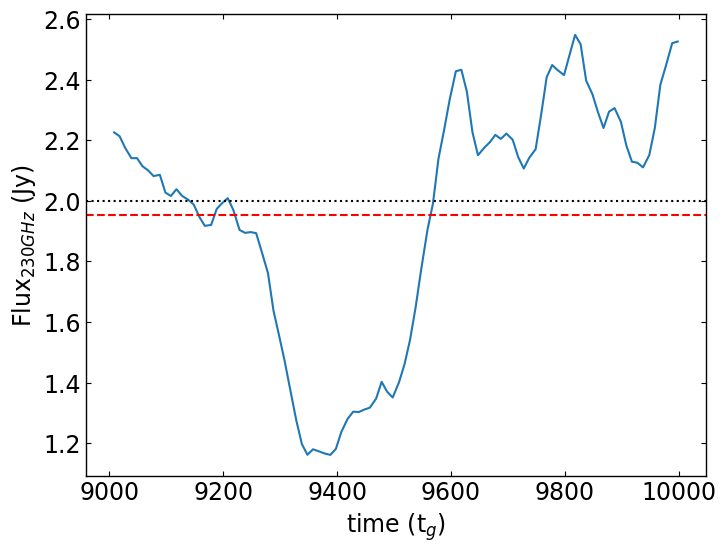

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [26]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.225557 Jy at 9008.139053
97:: 2.212769 Jy at 9017.844868
98:: 2.174428 Jy at 9027.551100
99:: 2.140306 Jy at 9038.646851
100:: 2.140652 Jy at 9048.356431
101:: 2.113734 Jy at 9058.061637
102:: 2.100394 Jy at 9067.764826
103:: 2.081355 Jy at 9077.464542
104:: 2.085467 Jy at 9088.552963
105:: 2.026876 Jy at 9098.254801
106:: 2.015660 Jy at 9107.957635
107:: 2.038046 Jy at 9117.659184
108:: 2.016261 Jy at 9127.363548
109:: 2.003073 Jy at 9138.452062
110:: 1.987060 Jy at 9148.158890
111:: 1.946722 Jy at 9157.868704
112:: 1.917005 Jy at 9167.579583
113:: 1.920192 Jy at 9178.672003
114:: 1.972771 Jy at 9188.377169
115:: 1.992278 Jy at 9198.079088
116:: 2.008489 Jy at 9207.781556
117:: 1.970281 Jy at 9217.482565
118:: 1.903538 Jy at 9228.573654
119:: 1.893993 Jy at 9238.281441
120:: 1.896466 Jy at 9247.990304
121:: 1.893115 Jy at 9257.698128
122:: 1.832379 Jy at 9267.401850
123:: 1.761092 Jy at 9278.487308
124:: 1.637332 Jy at 9288.189770
125:: 1.555940 Jy at 9297.894634
126:: 1.472749

In [27]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 50, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc50/BHOSS_CODE
96, flux: 2.270953 at 9008.139053
97, flux: 2.247633 at 9017.844868
98, flux: 2.185862 at 9027.551100
99, flux: 2.137860 at 9038.646851
100, flux: 2.142027 at 9048.356431
101, flux: 2.116240 at 9058.061637
102, flux: 2.104137 at 9067.764826
103, flux: 2.095358 at 9077.464542
104, flux: 2.128588 at 9088.552963
105, flux: 2.092200 at 9098.254801
106, flux: 2.101687 at 9107.957635
107, flux: 2.127806 at 9117.659184
108, flux: 2.116079 at 9127.363548
109, flux: 2.112195 at 9138.452062
110, flux: 2.068057 at 9148.158890
111, flux: 1.992012 at 9157.868704
112, flux: 1.967555 at 9167.579583
113, flux: 2.020515 at 9178.672003
114, flux: 2.042772 at 9188.377169
115, flux: 2.019345 at 9198.079088
116, flux: 2.015585 at 9207.781556
117, flux: 1.974715 at 9217.482565
118, flux: 1.911696 at 9228.573654
119, flux: 1.911802 at 9238.281441
120, flux: 1.926413 at 9247.990304
121, flux: 1.950447 at 9257.698128
122, flux

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.918173 Jy, the density scale = 1.190000e-18


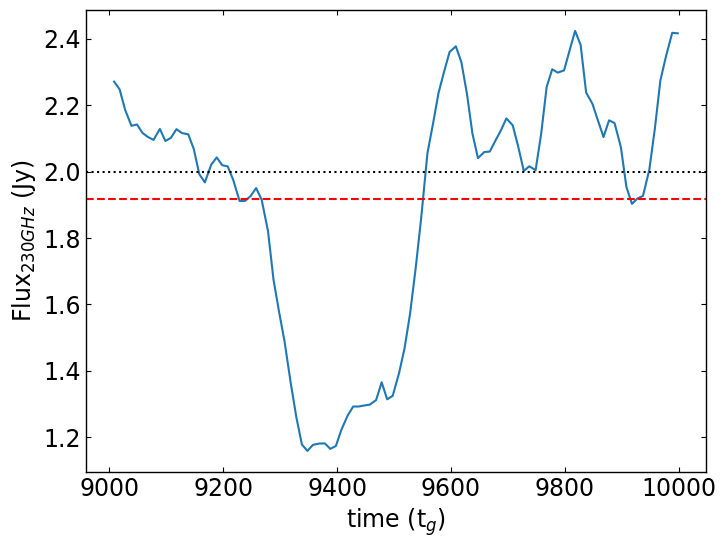

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.270953 Jy at 9008.139053
97:: 2.247633 Jy at 9017.844868
98:: 2.185862 Jy at 9027.551100
99:: 2.137860 Jy at 9038.646851
100:: 2.142027 Jy at 9048.356431
101:: 2.116240 Jy at 9058.061637
102:: 2.104137 Jy at 9067.764826
103:: 2.095358 Jy at 9077.464542
104:: 2.128588 Jy at 9088.552963
105:: 2.092200 Jy at 9098.254801
106:: 2.101687 Jy at 9107.957635
107:: 2.127806 Jy at 9117.659184
108:: 2.116079 Jy at 9127.363548
109:: 2.112195 Jy at 9138.452062
110:: 2.068057 Jy at 9148.158890
111:: 1.992012 Jy at 9157.868704
112:: 1.967555 Jy at 9167.579583
113:: 2.020515 Jy at 9178.672003
114:: 2.042772 Jy at 9188.377169
115:: 2.019345 Jy at 9198.079088
116:: 2.015585 Jy at 9207.781556
117:: 1.974715 Jy at 9217.482565
118:: 1.911696 Jy at 9228.573654
119:: 1.911802 Jy at 9238.281441
120:: 1.926413 Jy at 9247.990304
121:: 1.950447 Jy at 9257.698128
122:: 1.915244 Jy at 9267.401850
123:: 1.821384 Jy at 9278.487308
124:: 1.675044 Jy at 9288.189770
125:: 1.578559 Jy at 9297.894634
126:: 1.488600

In [44]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc70/BHOSS_CODE
96, flux: 2.456075 at 9008.139053
97, flux: 2.400538 at 9017.844868
98, flux: 2.305061 at 9027.551100
99, flux: 2.253936 at 9038.646851
100, flux: 2.278058 at 9048.356431
101, flux: 2.247350 at 9058.061637
102, flux: 2.247368 at 9067.764826
103, flux: 2.260243 at 9077.464542
104, flux: 2.355826 at 9088.552963
105, flux: 2.330916 at 9098.254801
106, flux: 2.350325 at 9107.957635
107, flux: 2.392199 at 9117.659184
108, flux: 2.367366 at 9127.363548
109, flux: 2.334537 at 9138.452062
110, flux: 2.255705 at 9148.158890
111, flux: 2.213550 at 9157.868704
112, flux: 2.168241 at 9167.579583
113, flux: 2.190303 at 9178.672003
114, flux: 2.215159 at 9188.377169
115, flux: 2.191779 at 9198.079088
116, flux: 2.190381 at 9207.781556
117, flux: 2.170483 at 9217.482565
118, flux: 2.170620 at 9228.573654
119, flux: 2.170242 at 9238.281441
120, flux: 2.210378 at 9247.990304
121, flux: 2.311524 at 9257.698128
122, flux

In [45]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [46]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.027422 Jy, the density scale = 1.170000e-18


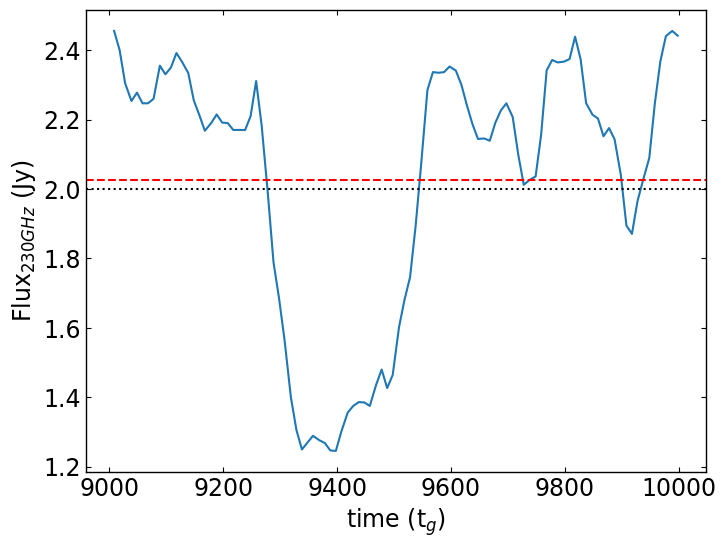

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [48]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.456075 Jy at 9008.139053
97:: 2.400538 Jy at 9017.844868
98:: 2.305061 Jy at 9027.551100
99:: 2.253936 Jy at 9038.646851
100:: 2.278058 Jy at 9048.356431
101:: 2.247350 Jy at 9058.061637
102:: 2.247368 Jy at 9067.764826
103:: 2.260243 Jy at 9077.464542
104:: 2.355826 Jy at 9088.552963
105:: 2.330916 Jy at 9098.254801
106:: 2.350325 Jy at 9107.957635
107:: 2.392199 Jy at 9117.659184
108:: 2.367366 Jy at 9127.363548
109:: 2.334537 Jy at 9138.452062
110:: 2.255705 Jy at 9148.158890
111:: 2.213550 Jy at 9157.868704
112:: 2.168241 Jy at 9167.579583
113:: 2.190303 Jy at 9178.672003
114:: 2.215159 Jy at 9188.377169
115:: 2.191779 Jy at 9198.079088
116:: 2.190381 Jy at 9207.781556
117:: 2.170483 Jy at 9217.482565
118:: 2.170620 Jy at 9228.573654
119:: 2.170242 Jy at 9238.281441
120:: 2.210378 Jy at 9247.990304
121:: 2.311524 Jy at 9257.698128
122:: 2.183046 Jy at 9267.401850
123:: 1.982990 Jy at 9278.487308
124:: 1.789111 Jy at 9288.189770
125:: 1.685888 Jy at 9297.894634
126:: 1.565154

In [49]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 90, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc90/BHOSS_CODE
96, flux: 2.529396 at 9008.139053
97, flux: 2.441261 at 9017.844868
98, flux: 2.345722 at 9027.551100
99, flux: 2.290613 at 9038.646851
100, flux: 2.296798 at 9048.356431
101, flux: 2.212206 at 9058.061637
102, flux: 2.206505 at 9067.764826
103, flux: 2.214489 at 9077.464542
104, flux: 2.317245 at 9088.552963
105, flux: 2.272729 at 9098.254801
106, flux: 2.348205 at 9107.957635
107, flux: 2.415644 at 9117.659184
108, flux: 2.378637 at 9127.363548
109, flux: 2.361436 at 9138.452062
110, flux: 2.273488 at 9148.158890
111, flux: 2.262147 at 9157.868704
112, flux: 2.207166 at 9167.579583
113, flux: 2.267635 at 9178.672003
114, flux: 2.239997 at 9188.377169
115, flux: 2.267437 at 9198.079088
116, flux: 2.295099 at 9207.781556
117, flux: 2.246039 at 9217.482565
118, flux: 2.178692 at 9228.573654
119, flux: 2.196746 at 9238.281441
120, flux: 2.235357 at 9247.990304
121, flux: 2.260451 at 9257.698128
122, flux

In [50]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [51]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.032652 Jy, the density scale = 1.140000e-18


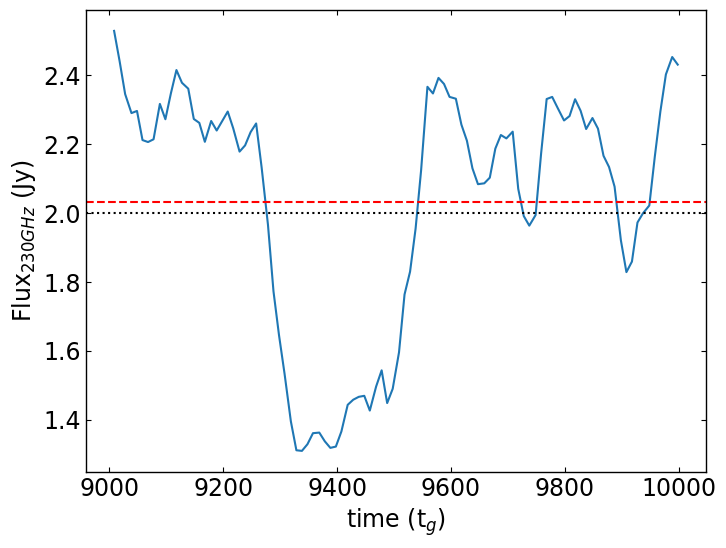

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [53]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.529396 Jy at 9008.139053
97:: 2.441261 Jy at 9017.844868
98:: 2.345722 Jy at 9027.551100
99:: 2.290613 Jy at 9038.646851
100:: 2.296798 Jy at 9048.356431
101:: 2.212206 Jy at 9058.061637
102:: 2.206505 Jy at 9067.764826
103:: 2.214489 Jy at 9077.464542
104:: 2.317245 Jy at 9088.552963
105:: 2.272729 Jy at 9098.254801
106:: 2.348205 Jy at 9107.957635
107:: 2.415644 Jy at 9117.659184
108:: 2.378637 Jy at 9127.363548
109:: 2.361436 Jy at 9138.452062
110:: 2.273488 Jy at 9148.158890
111:: 2.262147 Jy at 9157.868704
112:: 2.207166 Jy at 9167.579583
113:: 2.267635 Jy at 9178.672003
114:: 2.239997 Jy at 9188.377169
115:: 2.267437 Jy at 9198.079088
116:: 2.295099 Jy at 9207.781556
117:: 2.246039 Jy at 9217.482565
118:: 2.178692 Jy at 9228.573654
119:: 2.196746 Jy at 9238.281441
120:: 2.235357 Jy at 9247.990304
121:: 2.260451 Jy at 9257.698128
122:: 2.131821 Jy at 9267.401850
123:: 1.966017 Jy at 9278.487308
124:: 1.772546 Jy at 9288.189770
125:: 1.645246 Jy at 9297.894634
126:: 1.533677